In [1]:
import keras

Using TensorFlow backend.


In [2]:
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    # Legacy Python that doesn't verify HTTPS certificates by default
    pass
else:
    # Handle target environment that doesn't support HTTPS verification
    ssl._create_default_https_context = _create_unverified_https_context

In [38]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np
import h5py
from keras.applications.vgg19 import VGG19

model = VGG16(weights='imagenet', include_top=True)
model_19 = VGG19(weights='imagenet', include_top=True)

model.layers.pop()
model_19.layers.pop()


img_path = '/Users/malaikannan/Documents/Work/Data/Transferlearning3/genMid.Plan-216831_1_1.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

features = model.predict(x)
features_19 = model_19.predict(x)

In [40]:
features.shape

(1, 1000)

In [14]:
features_19.shape

(1, 1000)

In [16]:
from IPython.display import display, Image, HTML
from keras.preprocessing import image as kimage
import skimage.io
import scipy.sparse as sp


In [34]:
import os
file_name_list = []
rootdir = '/Users/malaikannan/Documents/Work/Data/Transferlearning3/'
for root,dirs, files in os.walk(rootdir):
    for file in files:
        if ".jpg" in file:
            file_name_list.append(file)

        

In [35]:
len(file_name_list)

4504

In [36]:
image_features_list = np.zeros(shape=(len(file_name_list),1000))

In [ ]:
for counter, value in enumerate(file_name_list):
    img_path = rootdir + value
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    features = model.predict(x)
    image_features_list[counter] = features

In [46]:
from gensim.models import KeyedVectors
import pickle

a = str(len(image_features_list))
b = str(len(image_features_list[0]))

with open('textvectorforgensim.txt', 'w') as f:
    f.write(a+' '+b+'\n')
    for i,vector in enumerate(image_features_list):
        f.write(str(i) + ' ' +  (' '.join(str(v) for v in vector)) + '\n' )

print('txtfilecreated')        
model = KeyedVectors.load_word2vec_format('textvectorforgensim.txt', binary=False)
print('modelloaded')   
model.save_word2vec_format('SentenceSimGensimModel.bin', binary=True)
print('savemodelcompleted')


txtfilecreated
modelloaded
savemodelcompleted


In [73]:
output = model.most_similar(positive=[image_features_list[2495]], topn=20)


/Users/malaikannan/Documents/Work/Data/Transferlearning3/genMid.40803661_14_0.jpg


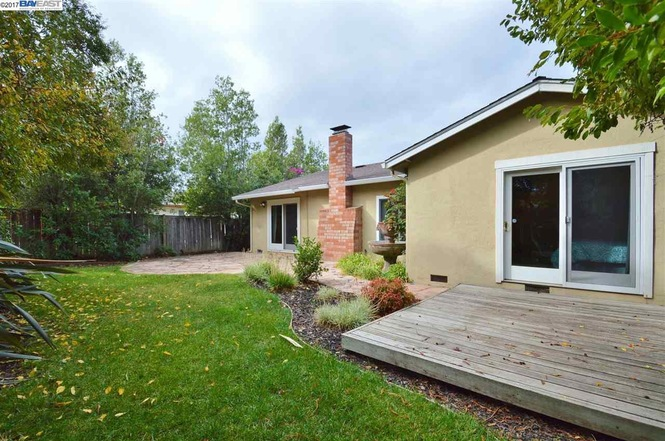

/Users/malaikannan/Documents/Work/Data/Transferlearning3/genMid.40801980_16_1.jpg


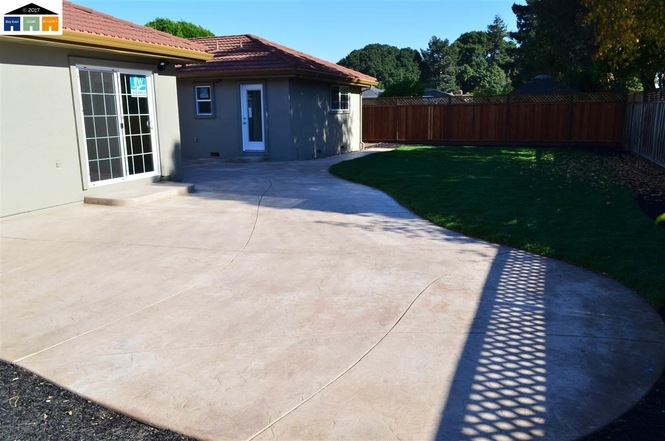

/Users/malaikannan/Documents/Work/Data/Transferlearning3/genMid.40801980_16_0.jpg


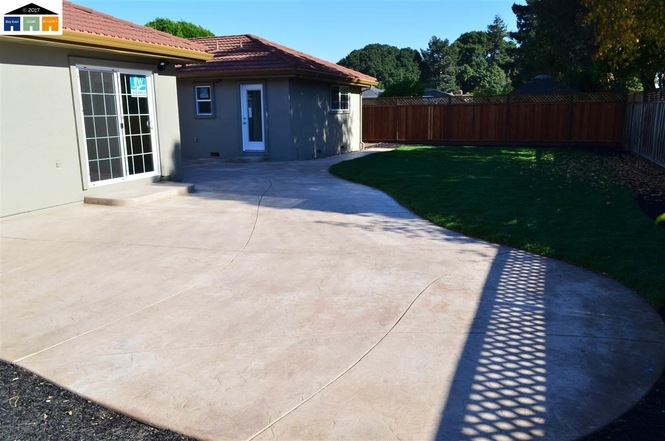

/Users/malaikannan/Documents/Work/Data/Transferlearning3/genMid.Plan-273988_4_1.jpg


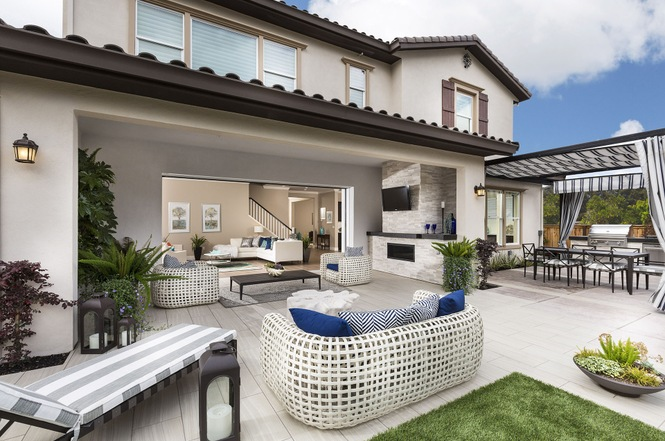

/Users/malaikannan/Documents/Work/Data/Transferlearning3/genMid.ML81682213_5_0.jpg


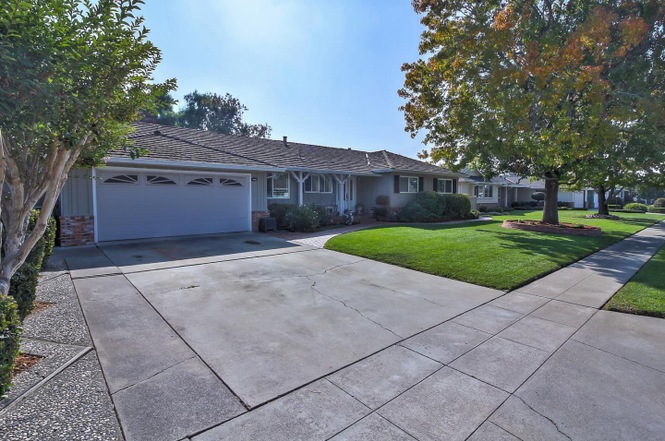

/Users/malaikannan/Documents/Work/Data/Transferlearning3/genMid.ML81682213_5_1.jpg


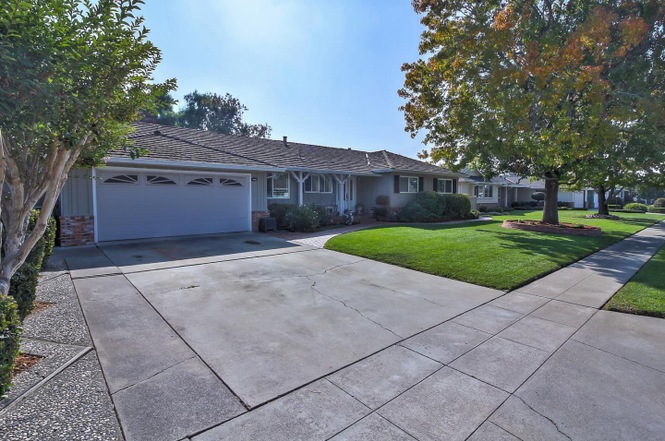

/Users/malaikannan/Documents/Work/Data/Transferlearning3/genMid.ML81682213_5_3.jpg


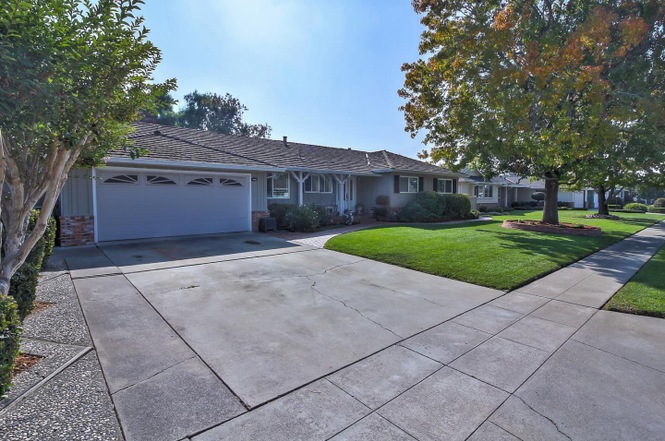

/Users/malaikannan/Documents/Work/Data/Transferlearning3/genMid.ML81682213_5_5.jpg


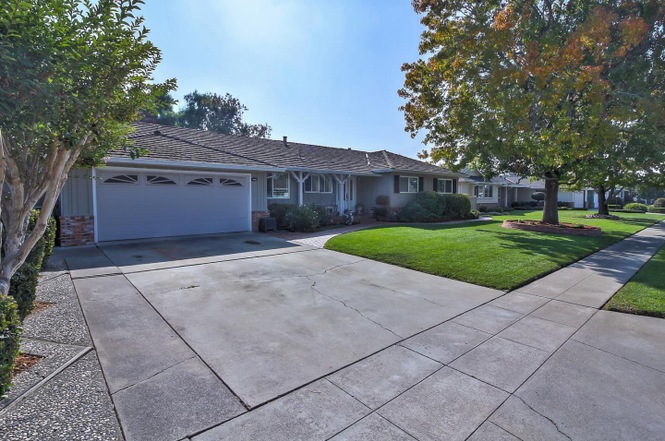

/Users/malaikannan/Documents/Work/Data/Transferlearning3/genMid.ML81682213_5_6.jpg


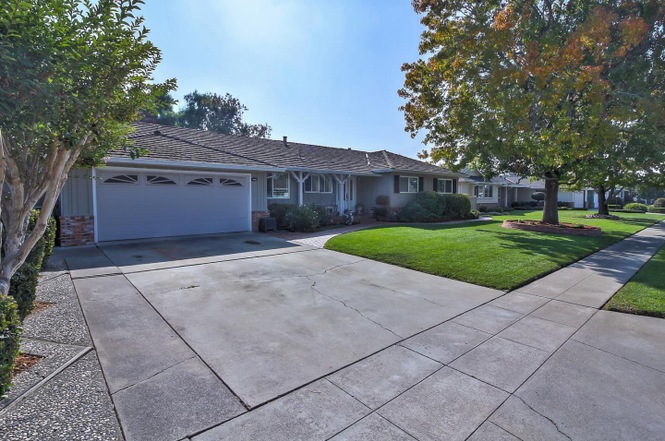

/Users/malaikannan/Documents/Work/Data/Transferlearning3/genMid.ML81682213_5_2.jpg


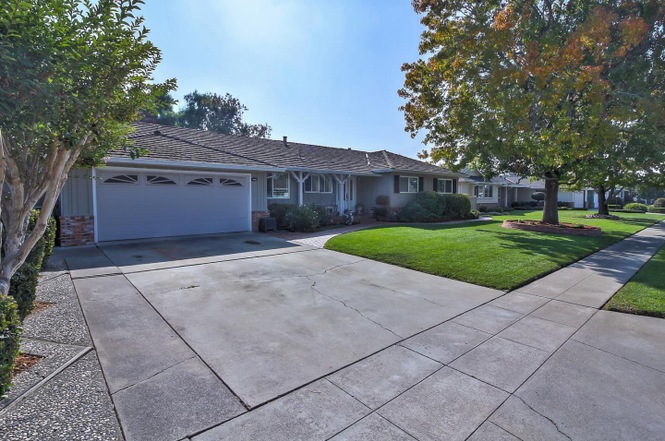

/Users/malaikannan/Documents/Work/Data/Transferlearning3/genMid.ML81682213_5_4.jpg


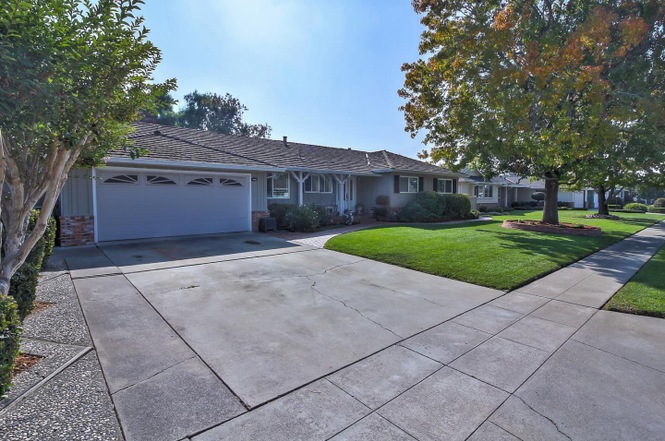

/Users/malaikannan/Documents/Work/Data/Transferlearning3/genMid.Plan-21257004_6_0.jpg


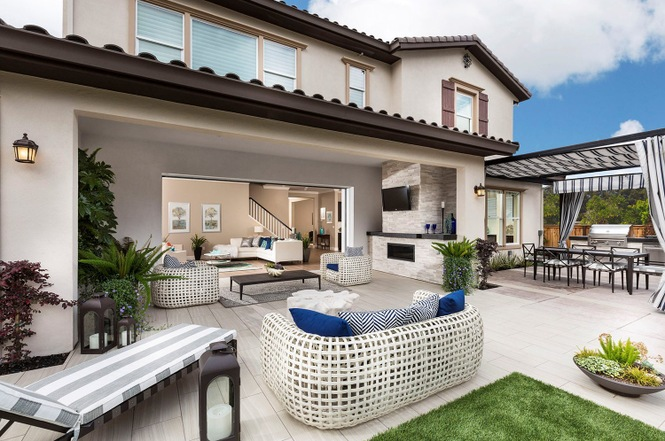

/Users/malaikannan/Documents/Work/Data/Transferlearning3/genMid.40803200_15_0.jpg


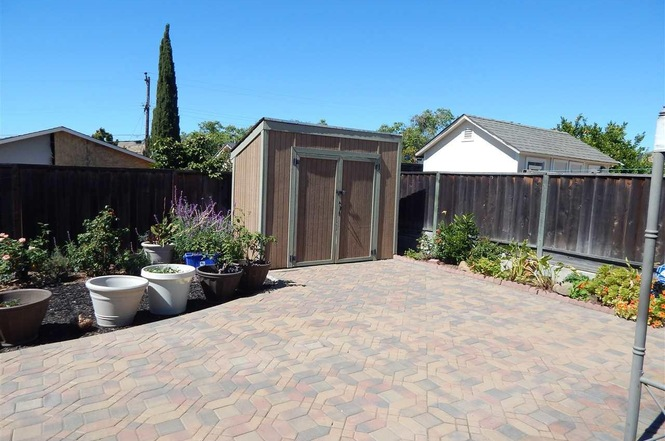

/Users/malaikannan/Documents/Work/Data/Transferlearning3/genMid.40803137_22_0.jpg


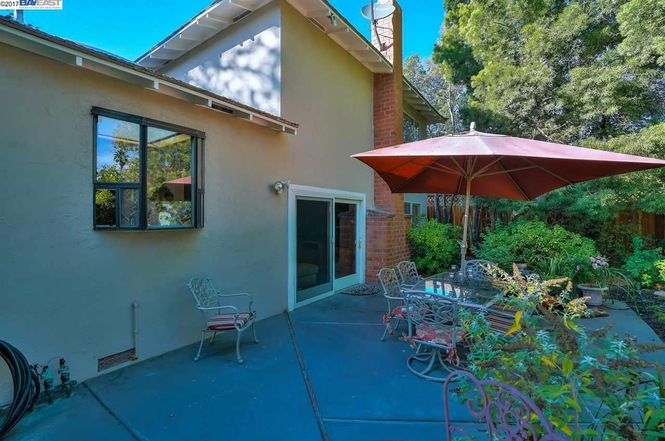

/Users/malaikannan/Documents/Work/Data/Transferlearning3/genMid.ML81684452_21_0.jpg


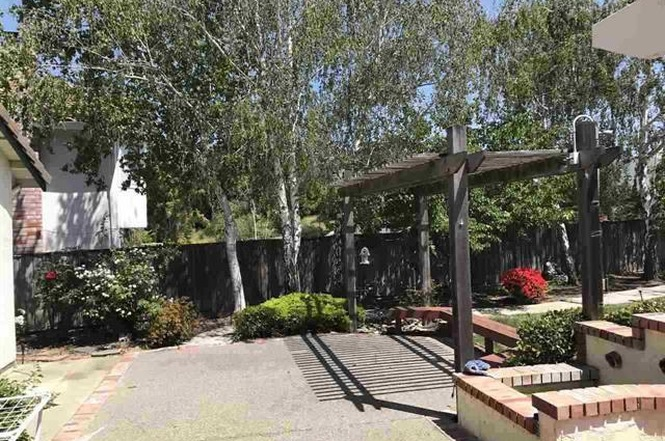

/Users/malaikannan/Documents/Work/Data/Transferlearning3/genMid.ML81684452_21_2.jpg


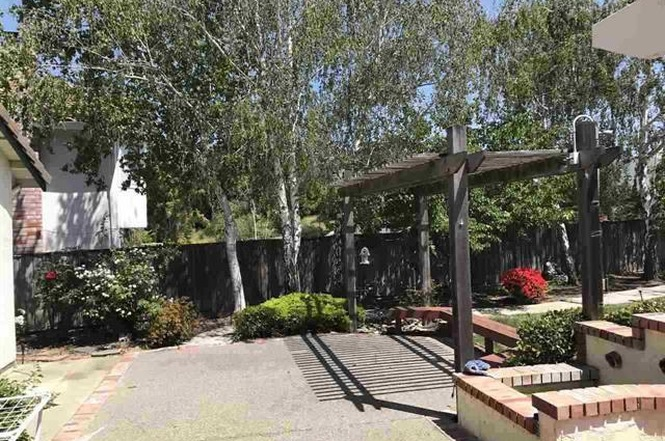

/Users/malaikannan/Documents/Work/Data/Transferlearning3/genMid.ML81684452_21_1.jpg


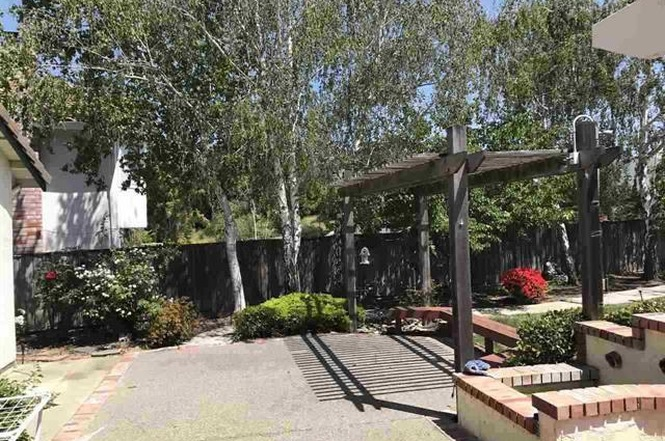

/Users/malaikannan/Documents/Work/Data/Transferlearning3/genMid.40802699_28_0.jpg


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [74]:
for item in output:
    img_file_name= '/Users/malaikannan/Documents/Work/Data/Transferlearning3/' + file_name_list[int(item[0])]
    print(img_file_name)
    display(Image(filename=img_file_name)) 

In [53]:
for counter,name in enumerate(file_name_list):
    if "genMid.40803661_5_0.jpg" in name:
        print(counter)

2505


In [70]:
for counter,name in enumerate(file_name_list):
    if "genMid.40803661_14_0.jpg" in name:
        print(counter)


2495
